In [1]:
#图像
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#任务中的图像导入不进来，就自己找了一张图来做
img=cv2.imread("E:\klee.jpg")

In [2]:
img

array([[[122, 125, 145],
        [122, 125, 145],
        [122, 125, 145],
        ...,
        [ 50,  65, 102],
        [ 50,  65, 103],
        [ 50,  65, 103]],

       [[122, 125, 145],
        [122, 125, 145],
        [122, 125, 145],
        ...,
        [ 50,  65, 102],
        [ 50,  65, 103],
        [ 50,  65, 103]],

       [[122, 125, 145],
        [122, 125, 145],
        [122, 125, 145],
        ...,
        [ 50,  65, 102],
        [ 50,  65, 103],
        [ 50,  65, 103]],

       ...,

       [[ 43,  59,  86],
        [ 43,  59,  86],
        [ 44,  60,  87],
        ...,
        [ 77, 142, 241],
        [ 77, 142, 241],
        [ 77, 142, 241]],

       [[ 43,  59,  86],
        [ 43,  59,  86],
        [ 44,  60,  87],
        ...,
        [ 77, 142, 241],
        [ 77, 142, 241],
        [ 77, 142, 241]],

       [[ 44,  60,  87],
        [ 44,  60,  87],
        [ 45,  61,  88],
        ...,
        [ 77, 142, 241],
        [ 77, 142, 241],
        [ 77, 142, 241]]

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape

(900, 1710, 3)

In [6]:
img=cv2.imread("E:\klee.jpg")
klee=img[0:100,0:100]
cv_show("klee",klee)

In [7]:
b,g,r=cv2.split(img)

In [8]:
b

array([[122, 122, 122, ...,  50,  50,  50],
       [122, 122, 122, ...,  50,  50,  50],
       [122, 122, 122, ...,  50,  50,  50],
       ...,
       [ 43,  43,  44, ...,  77,  77,  77],
       [ 43,  43,  44, ...,  77,  77,  77],
       [ 44,  44,  45, ...,  77,  77,  77]], dtype=uint8)

In [9]:
b.shape

(900, 1710)

In [10]:
img=cv2.merge((b,g,r))
img.shape

(900, 1710, 3)

In [11]:
#ROI
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [12]:
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [13]:
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

In [14]:
#边界填充
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT,value=0)

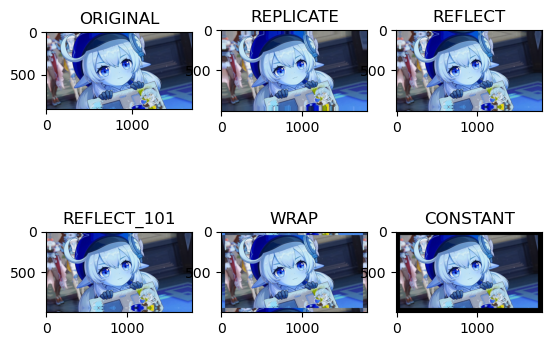

In [15]:
#绘制子图
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title("REPLICATE")
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect_101, 'gray'), plt.title("REFLECT_101")
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title("CONSTANT")

plt.show()

In [16]:
img = cv2.imread("E:\klee.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv_show('thresh',thresh)

In [17]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
#绘制
res = cv2.drawContours(img,contours, -1,(0,0,225),2)

In [19]:
draw_img = img.copy()
res = cv2.drawContours(draw_img,contours,0,(0,0,225),2)
cv_show('res',res)